<a href="https://colab.research.google.com/github/kaiqued/MachineLearning/blob/main/FUNCIONANDOOO_Le_C%C3%B4d%C3%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:pink">**PROJETO FINAL DE MACHINE LEARNING 2022.1**</span>
### **COLORIZAÇÃO DE IMAGENS BASEADA EM CAPAS DE ÁLBUNS**
NICOLE SARVASI ALVES DA COSTA & KAÍQUE DOGNANI

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importação de bibliotecas:

In [2]:
from tensorflow import keras
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2hsv
import numpy as np
import os
from skimage.color import hsv2rgb
import PIL
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2 as cv

Importando a base de dados:

Passando as imagens para HSV e dividindo-as por canal de cor, o X_hsv para o canal de valor (V) e o Y_hsv para os canais de matriz (H) e saturação (S).

In [3]:
def RGB2X_Y():
    with open('drive/MyDrive/Colab Notebooks/dados.pkl', 'rb') as file:
        newDataSet = pickle.load(file)
        file.close()
    newDataSet = newDataSet[np.random.choice(newDataSet.shape[0], 11000), :, :, :]
    newDataSet = newDataSet/255.0
    for index, img in enumerate(newDataSet):
        newDataSet[index] = rgb2hsv(img)
    X_hsv = np.expand_dims(newDataSet[:,:,:,2], 3)
    Y_hsv = newDataSet[:,:,:,:2]

    return X_hsv, Y_hsv

X_train, Y_train = RGB2X_Y()

In [4]:
# with open('drive/MyDrive/Colab Notebooks/dados_XY.pkl', 'wb') as file:
#     pickle.dump((X_hsv, Y_hsv), file)

In [5]:
# with open('drive/MyDrive/Colab Notebooks/dados_XY.pkl', 'rb') as file:
#     X_hsv, Y_hsv = pickle.load(file)

Separando o conjunto de treino e teste:

In [6]:
Y_train.shape

(11000, 150, 150, 2)

In [7]:
X_train.shape

(11000, 150, 150, 1)

Criando um modelo básico:

In [8]:
# model = keras.models.Sequential([
#     keras.layers.Conv2D(256, input_shape=[150,150,1], kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(5, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(2, kernel_size=3, padding="same", activation="sigmoid"), 
# ])


In [9]:
# model = keras.models.Sequential([
#     keras.layers.Conv2D(2, input_shape=[150,150,1], kernel_size=3, padding="same", activation="selu"),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(4, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.UpSampling2D(size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.UpSampling2D(size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.UpSampling2D(size=(2,2)),
#     keras.layers.Resizing(150, 150),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(2, kernel_size=3, padding="same", activation="linear"), 
# ])


In [10]:
# model = keras.models.Sequential([
#     keras.layers.Conv2D(2, input_shape=[150,150,1], kernel_size=3, padding="same", activation="selu"),
#     keras.layers.Flatten(),
#     keras.layers.Dense(),
#     keras.layers.Dense(),
#     keras.layers.Reshape(),
#     keras.layers.Conv2D(2, kernel_size=3, padding="same", activation="linear"), 
# ])

In [22]:
#nick testando autoencoder
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[150,150,1]),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(50, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(200, activation="selu", input_shape=[50]),
    keras.layers.Dense(150 * 150, activation="sigmoid"),
    keras.layers.Reshape([150, 150,1]),
    keras.layers.Conv2D(2, kernel_size=3, padding="same", activation="sigmoid")
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse",
                   optimizer="nadam")
history = stacked_ae.fit(X_train, X_train, epochs=500, batch_size = 256)

Epoch 1/500
43/43 [==============================] - 13s 61ms/step - loss: 0.0834
Epoch 2/500
43/43 [==============================] - 2s 52ms/step - loss: 0.0701
Epoch 3/500
43/43 [==============================] - 2s 53ms/step - loss: 0.0629
Epoch 4/500
43/43 [==============================] - 2s 54ms/step - loss: 0.0589
Epoch 5/500
43/43 [==============================] - 2s 53ms/step - loss: 0.0563
Epoch 6/500
43/43 [==============================] - 2s 51ms/step - loss: 0.0546
Epoch 7/500
43/43 [==============================] - 2s 53ms/step - loss: 0.0514
Epoch 8/500
43/43 [==============================] - 2s 53ms/step - loss: 0.0500
Epoch 9/500
43/43 [==============================] - 2s 52ms/step - loss: 0.0483
Epoch 10/500
43/43 [==============================] - 2s 53ms/step - loss: 0.0470
Epoch 11/500
43/43 [==============================] - 2s 54ms/step - loss: 0.0459
Epoch 12/500
43/43 [==============================] - 2s 52ms/step - loss: 0.0446
Epoch 13/500
43/43 [====

In [12]:
# model.compile(loss="mse", optimizer="nadam")

In [13]:
#history = model.fit(X_train, Y_train, epochs=1000, batch_size=128)

#score = model.evaluate(X_test, Y_test)

In [23]:
import PIL
path_img = "drive/MyDrive/Colab Notebooks/tt.jpg"
file = PIL.Image.open(path_img)
if file.size != (150,150):
    file = file.resize((150,150))
    file.save(path_img)

In [24]:
img = img_to_array(load_img(path_img))
print(img.shape)

(150, 150, 3)


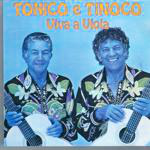

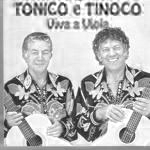

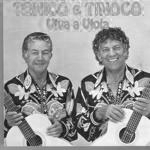

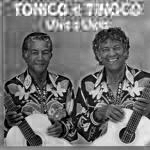

In [25]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

b,g,r = cv.split(img)  #separação em bgr
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

In [26]:
img_hsv   = rgb2hsv(img/255.0)
img_X_test = np.expand_dims(img_hsv[:,:,2],2)
print(img_X_test.shape)
img_Y_test = img_hsv[:,:,:2]

(150, 150, 1)


In [27]:
img_Y_pred = stacked_ae.predict(np.array([img_X_test]))
img_Y_pred.shape

(1, 150, 150, 2)

In [28]:
img_pred_hsv = np.concatenate((img_Y_pred[0,:,:,:],img_X_test), axis=2)
img_test_hsv = np.concatenate((img_Y_test,img_X_test), axis=2)

In [29]:
print("img_pred_hsv",img_pred_hsv.shape)
print("img_teste_hsv",img_test_hsv.shape)

img_pred_hsv (150, 150, 3)
img_teste_hsv (150, 150, 3)


In [30]:
Imagem_Pred = (255*hsv2rgb(img_pred_hsv)).astype(np.uint8)
Imagem_Test = (255*hsv2rgb(img_test_hsv)).astype(np.uint8)
print("Imagem_Pred",Imagem_Pred.shape)
print("Imagem_Test",Imagem_Test.shape)

Imagem_Pred (150, 150, 3)
Imagem_Test (150, 150, 3)


Text(0.5, 1.0, 'Pred')

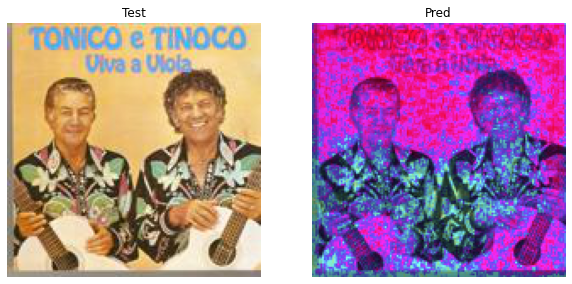

In [31]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(Imagem_Test)
plt.axis('off')
plt.title("Test")

fig.add_subplot(1,2,2)
plt.imshow(Imagem_Pred)
plt.axis('off')
plt.title("Pred")

In [ ]:
plt.imshow(img_pred_hsv[:,:,1])

In [ ]:
img_pred_hsv.max()